In [1]:
import torch
import Trainer
from network import NFM
import torch.utils.data as Data
from Utils.criteo_loader import getTestData, getTrainData

nfm_config = \
{
    'n_class':9,
    'linear_hidden1':800,#线性模型输出层（隐层个数）
    'embed_input_dim':101,#embed输入维度##########################20,101,1001
    'embed_dim': 10, # 用于控制稀疏特征经过Embedding层后的稠密特征大小，embed输出维度
    'dnn_hidden_units': [50,9],#MLP隐层和输出层
    'num_sparse_features_cols':3300,#the number of the gene columns
    'num_dense_features': 0,#dense features number
    'bi_dropout': 0.5,#Bi-Interaction 的dropout
    'num_epoch': 500,#训练epoch次数
    'batch_size': 24,#batch_size
    'lr': 1e-3,
    'l2_regularization': 1e-4,
    'device_id': 0,
    'use_cuda': False,
    'train_label': 'dataset/gene_247/train/guan_train_label.csv',
    'train_data':'dataset/gene_247/train/guan_train_data.csv',
    'test_label':'dataset/gene_247/test/qiu_test_label.csv',
    'test_data':'dataset/gene_247/test/qiu_test_data.csv',
    'gene_name':'dataset/qiuguan/origin_800/gene_name.csv',
    'label_name':'dataset/qiuguan/origin_800/gene_label.csv'
    #'fea_file': '../Data/criteo/processed_data/fea_col.npy',
    #'validate_file': '../Data/criteo/processed_data/val_set.csv',
    #'test_file': '../Data/criteo/processed_data/test_set.csv',
    #'model_name': '../TrainedModels/NFM.model'
}

nfm_config1 = \
{
    'n_class':9,
    'linear_hidden1':800,#线性模型输出层（隐层个数）
    'embed_input_dim':20,#embed输入维度
    'embed_dim': 10, # 用于控制稀疏特征经过Embedding层后的稠密特征大小，embed输出维度
    'dnn_hidden_units': [50,9],#MLP隐层和输出层
    'num_sparse_features_cols':266,#the number of the gene columns
    'num_dense_features': 0,#dense features number
    'bi_dropout': 0.5,#Bi-Interaction 的dropout
    'num_epoch': 500,#训练epoch次数
    'batch_size': 24,#batch_size
    'lr': 1e-3,
    'l2_regularization': 1e-4,
    'device_id': 0,
    'use_cuda': False,
    'train_label': 'dataset/gene_247/train/guan_train_label.csv',
    'train_data':'dataset/gene_247/train/guan_train_data.csv',
    'test_label':'dataset/gene_247/test/qiu_test_label.csv',
    'test_data':'dataset/gene_247/test/qiu_test_data.csv',
    'gene_name':'dataset/qiuguan/origin_800/gene_name.csv',
    'label_name':'dataset/qiuguan/origin_800/gene_label.csv'
    #'fea_file': '../Data/criteo/processed_data/fea_col.npy',
    #'validate_file': '../Data/criteo/processed_data/val_set.csv',
    #'test_file': '../Data/criteo/processed_data/test_set.csv',
    #'model_name': '../TrainedModels/NFM.model'
}
nfm_config2 = \
{
    'n_class':9,
    'linear_hidden1':800,#线性模型输出层（隐层个数）
    'embed_input_dim':20,#embed输入维度
    'embed_dim': 10, # 用于控制稀疏特征经过Embedding层后的稠密特征大小，embed输出维度
    'dnn_hidden_units': [50,9],#MLP隐层和输出层
    'num_sparse_features_cols':135,#the number of the gene columns
    'num_dense_features': 0,#dense features number
    'bi_dropout': 0.5,#Bi-Interaction 的dropout
    'num_epoch': 500,#训练epoch次数
    'batch_size': 24,#batch_size
    'lr': 1e-3,
    'l2_regularization': 1e-4,
    'device_id': 0,
    'use_cuda': False,
    'train_label': 'dataset/gene_247/train/guan_train_label.csv',
    'train_data':'dataset/gene_247/train/guan_train_data.csv',
    'test_label':'dataset/gene_247/test/qiu_test_label.csv',
    'test_data':'dataset/gene_247/test/qiu_test_data.csv',
    'gene_name':'dataset/qiuguan/origin_800/gene_name.csv',
    'label_name':'dataset/qiuguan/origin_800/gene_label.csv'
    #'fea_file': '../Data/criteo/processed_data/fea_col.npy',
    #'validate_file': '../Data/criteo/processed_data/val_set.csv',
    #'test_file': '../Data/criteo/processed_data/test_set.csv',
    #'model_name': '../TrainedModels/NFM.model'
}


import os
import time
import argparse
import numpy as np
import pandas as pd 

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torch.backends.cudnn as cudnn
#3from tensorboardX import SummaryWriter
import torch.nn.functional as F  # 激励函数的库
#import network
import config
import evaluate
import data_utils
#import Trainer



def one_hot_smoothing(labels, classes, label_smoothing=0.2):
    #n = len(labels)
    n=labels.shape[0]
    eoff = label_smoothing / classes
    output = np.ones((n, classes), dtype=np.float32) * eoff
    for row, label in enumerate(labels):
        output[row, label] = 1 - label_smoothing + eoff
        #print("row:",row,"label:",label)
    return output

def one_hot(labels, classes):
    n = len(labels)
    #eoff = label_smoothing / classes
    output = np.zeros((n, classes), dtype=np.float32)
    for row, label in enumerate(labels):
        output[row, label] = 1
        #print("row:",row,"label:",label)
    return output

class KZDatasetPredict(data.Dataset):
    """ Construct the FM pytorch dataset. """
    #def __init__(self, file,label_file, feature_map,n_class=16):
    def __init__(self, df_list):
    
       
        self.data_info = self.get_data_info(df_list)
        
        
            
        
        
        

    def __getitem__(self, index):
        # Dataset读取图片的函数
        data, bi_data,label = self.data_info[index]
        #img = Image.open(img_pth).convert('RGB')
        
        return data, bi_data,label

    def __len__(self):
        return len(self.data_info)
   
    
    
    def get_data_info(self,df_list):
        #解析路径
        #转为一维list存储，每一位为【图片路径，图片类别】
        labels=[]
        data_info=[]
        print('data_info:',df_list[-1])
        #df=pd.read_csv(csv_path,sep=',')
        #df=df.iloc[:,1:]
        
        #print(df.iloc[:,-1])
        #df=df.applymap(ast.literal_eval)
        label=int(df_list[-1])
        labels.append(label)
        print('labels:',labels)
        data=df_list[:-1]
        #df_np=np.array(df_list)
        #print(rows,cols)
        
        #print('labels:',labels)
        labels=np.array(labels)
        print('labels.shape:',labels.shape)
        #print('labels:',labels)
        #labels=np.array(labels)
        labels=one_hot_smoothing(labels,nfm_config['n_class'])
        #print(labels)
        
           
        
        data=np.array(data)#
            
            
            
            
            
            
            
            
        data=torch.from_numpy(data)#
            
        labels=torch.from_numpy(labels)#
        bi_data=embding_process(nfm_config,data)
        #print("bi_data.shape:",bi_data.shape)
            
            
        data_info.append((data,bi_data,label))
        return data_info
    
class KZDatasetTest(data.Dataset):
    """ Construct the FM pytorch dataset. """
    #def __init__(self, file,label_file, feature_map,n_class=16):
    def __init__(self, csv_path):
    
       
        self.data_info = self.get_data_info(csv_path)
        
        
            
        
        
        

    def __getitem__(self, index):
        # Dataset读取图片的函数
        data, bi_data,label = self.data_info[index]
        #img = Image.open(img_pth).convert('RGB')
        
        return data, bi_data,label

    def __len__(self):
        return len(self.data_info)
   
    
    
    def get_data_info(self,csv_path):
        #解析路径
        #转为一维list存储，每一位为【图片路径，图片类别】
        labels=[]
        data_info=[]
        
        df=pd.read_csv(csv_path,sep=',')
        df=df.iloc[:,1:]
        
        #print(df.iloc[:,-1])
        #df=df.applymap(ast.literal_eval)
        rows,cols=df.shape
        #print(rows,cols)
        for i in df.iloc[:,-1]:
            #print(i)
            labels.append(int(i))
        #print('labels:',labels)
        labels=np.array(labels)
        #print('labels:',labels)
        #labels=np.array(labels)
        labels=one_hot_smoothing(labels,nfm_config['n_class'])
        #print(labels)
        for i in range(rows):
            data=df.iloc[i,:-1]#data
            data=data.astype(float)#
            data=np.array(data)#
            
            
            #data=torch.from_numpy(data)
            
            
            
            
            label=labels[i]#label
            #print(data.shape)
            #print(label.shape)
            #label=label.tolist()
            data=torch.from_numpy(data)#
            #print("data.shape:",data.shape)
            label=torch.from_numpy(label)#
            bi_data=embding_process(nfm_config,data)
            #print("bi_data.shape:",bi_data.shape)
            
            
            data_info.append((data,bi_data,label))
        return data_info
    
    
    
import torch
import torch.nn as nn
from torch.utils.data.dataset import *
from PIL import Image
from torch.nn import functional as F
import random
from sklearn.model_selection import train_test_split
import ast
import torchvision


        

class KZDataset(Dataset):
    def __init__(self, csv_path, K,n_class,ki=0, typ='train', transform=None, rand=False):
        
        self.all_data_info = self.get_data_info(csv_path)
        
        if rand:
            random.seed(1)
            random.shuffle(self.all_data_info)
        leng = len(self.all_data_info)
        every_z_len = leng // K
        if typ == 'val':
            self.data_info = self.all_data_info[every_z_len * ki : every_z_len * (ki+1)]
        elif typ == 'train':
            self.data_info = self.all_data_info[: every_z_len * ki] + self.all_data_info[every_z_len * (ki+1) :]
            
        self.transform = transform
        
        

    def __getitem__(self, index):
        # Dataset读取图片的函数
        data, bi_data,label = self.data_info[index]
        #img = Image.open(img_pth).convert('RGB')
        
        return data, bi_data,label

    def __len__(self):
        return len(self.data_info)
    
    
    def get_data_info(self,csv_path):
        #解析路径
        #转为一维list存储，每一位为【图片路径，图片类别】
        labels=[]
        data_info=[]
        df=pd.read_csv(csv_path,sep=',')
        df=df.iloc[:,1:]
        
        #print(df.iloc[:,-1])
        #df=df.applymap(ast.literal_eval)
        rows,cols=df.shape
        #print(rows,cols)
        for i in df.iloc[:,-1]:
            #print(i)
            labels.append(int(i))
        #print('labels:',labels)
        labels=np.array(labels)
        #print('labels:',labels)
        #labels=np.array(labels)
        labels=one_hot_smoothing(labels,nfm_config['n_class'])
        #print(labels)
        for i in range(rows):
            data=df.iloc[i,:-1]#data
            data=data.astype(float)#
            data=np.array(data)#
            
            
            #data=torch.from_numpy(data)
            
            
            
            
            label=labels[i]#label
            #print(data.shape)
            #print(label.shape)
            #label=label.tolist()
            data=torch.from_numpy(data)#
            #print("data.shape:",data.shape)
            label=torch.from_numpy(label)#
            bi_data=embding_process(nfm_config,data)
            #print("bi_data.shape:",bi_data.shape)
           
            
            data_info.append((data,bi_data,label))
        return data_info
            

import os
import time
import argparse
import numpy as np
import pandas as pd 

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torch.backends.cudnn as cudnn


import os
import time
import argparse
import numpy as np
import pandas as pd 

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torch.backends.cudnn as cudnn
#3from tensorboardX import SummaryWriter
from torch.autograd import Variable
from torch.utils.data import DataLoader
from sklearn.metrics import roc_auc_score
from new_nfm_network import NFM
import os
import time
import argparse
import numpy as np
import pandas as pd 
import sys

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torch.backends.cudnn as cudnn
#3from tensorboardX import SummaryWriter
import sys 
#import network
import config
import evaluate
import data_utils
import Trainer
import torchmetrics
#import network
import config
import evaluate
import data_utils
import Trainer
#from utils import 
#准备训练集
#from new_dataset_processed import FMData
#from dataset_process import FMData
def train_epoch(model,train_loader,batch_size,optimizer,loss_func):
    BATCH_SIZE=batch_size
    total = 0
    correct=0
    total_loss=0
    #
    total_train_accuracy=0  
    model.train()
    for batch_idx, (x, bi_x,labels) in enumerate(train_loader):
            
        x = Variable(x)
        bi_x=Variable(bi_x)
        labels = Variable(labels)
            
            
        #x = torch.tensor(x, dtype=torch.float)
        #x=x.clone().detach().requires_grad_(True)
        x=torch.tensor(x,dtype=torch.float)
        bi_x=torch.tensor(bi_x,dtype=torch.long)
        labels=torch.tensor(labels,dtype=torch.float)
        x, bi_x,labels = x.cuda(), bi_x.cuda(),labels.cuda()
        labels_int=labels=torch.max(labels,1)[1]
            
        optimizer.zero_grad()
        y_predict = model(x,bi_x)
            
        loss = loss_func(y_predict, labels)
        loss.backward()
        optimizer.step()
            
        loss = loss.item()
           

        total_loss += loss
            
            
            
        batch_train_acc=torchmetrics.functional.accuracy(y_predict,labels_int)
        total_train_accuracy+=batch_train_acc
            
    total_train_accuracy/=(batch_idx+1)
    print('total_train_accuracy:',total_train_accuracy)
    print("Training Epoch: %d, total loss: %f" % (epoch_id, total_loss))
    return total_loss,total_train_accuracy



def val_epoch(model,test_loader,batch_size,optimizer): 
    batch_size_num=0
    total_test_acc=0
    model.eval()
    for i , (inputs ,bi_inputs, targets) in enumerate(test_loader):   
            print("test")
            # evaluate the model on the test set   
            #print(\ inputs:\  inputs)   
            #print(\ targets:\  targets)   
            inputs = Variable(inputs)   
            bi_inputs=Variable(bi_inputs)
            targets = Variable(targets)     
            #x = torch.tensor(x  dtype=torch.float)   
            #x=x.clone().detach().requires_grad_(True)   
            inputs=torch.tensor(inputs ,dtype=torch.float)  
            bi_inputs=torch.tensor(bi_inputs,dtype=torch.float)
            targets=torch.tensor(targets ,dtype=torch.float)   
            inputs ,bi_inputs,targets = inputs.cuda(),bi_inputs.cuda(), targets.cuda()   
            yhat = model(inputs,bi_inputs)   
            
            
            
            targets=torch.max(targets,1)[1]
            
            
            
            batch_test_acc=torchmetrics.functional.accuracy(yhat,targets)
            
            total_test_acc+=batch_test_acc
            
            batch_size_num=i
    total_test_acc/=(batch_size_num+1)
        ###print('total_test_accuracy:',total_test_acc/(batch_size+1))
    print('total_test_accuracy:',total_test_acc)
        
    return total_test_acc




import torch.nn as nn
class BiInteractionPooling(nn.Module):
    """Bi-Interaction Layer used in Neural FM,compress the
      pairwise element-wise product of features into one single vector.
      Input shape
        - A 3D tensor with shape:``(batch_size,field_size,embedding_size)``.
      Output shape
    http://127.0.0.1:3000/notebooks/NFM-pyorch-master/NFM-pyorch-master/%E6%9C%AA%E5%91%BD%E5%90%8D5.ipynb?kernel_name=python3#    - 3D tensor with shape: ``(batch_size,1,embedding_size)``.
    """
    def __init__(self):
        super(BiInteractionPooling, self).__init__()

    def forward(self, inputs):
        concated_embeds_value = inputs
        square_of_sum = torch.pow(
            torch.sum(concated_embeds_value, dim=1, keepdim=True), 2)
        sum_of_square = torch.sum(
            concated_embeds_value * concated_embeds_value, dim=1, keepdim=True)
        cross_term = 0.5 * (square_of_sum - sum_of_square)
        return cross_term

import torch.nn as nn
class BiInteractionPooling(nn.Module):
    """Bi-Interaction Layer used in Neural FM,compress the
      pairwise element-wise product of features into one single vector.
      Input shape
        - A 3D tensor with shape:``(batch_size,field_size,embedding_size)``.
      Output shape
    http://127.0.0.1:3000/notebooks/NFM-pyorch-master/NFM-pyorch-master/%E6%9C%AA%E5%91%BD%E5%90%8D5.ipynb?kernel_name=python3#    - 3D tensor with shape: ``(batch_size,1,embedding_size)``.
    """
    def __init__(self):
        super(BiInteractionPooling, self).__init__()

    def forward(self, inputs):
        concated_embeds_value = inputs
        #print("bi_interaction compute:")
        #print("inputs:",inputs.shape)
        square_of_sum = torch.pow(
            torch.sum(concated_embeds_value, dim=1, keepdim=True), 2)
        #print("square_of_sum：",square_of_sum.shape)
        sum_of_square = torch.sum(
            concated_embeds_value * concated_embeds_value, dim=1, keepdim=True)
        #print("sum_of_square:",sum_of_square.shape)
        cross_term = 0.5 * (square_of_sum - sum_of_square)
        #print("cross_term:",cross_term.shape)
        return cross_term
    
    
def embding_process(config,sparse_inputs):
    #sparse_inputs=torch.tensor(sparse_inputs)
    #sparse_inputs=torch.tensor(sparse_inputs,dtype=torch.int8)
    sparse_inputs=sparse_inputs.int()
    embedding_layers=nn.Embedding(config['embed_input_dim'],config['embed_dim'])
    #print("sparse_inputs:",sparse_inputs.shape)   
    # B-Interaction 层
    bi_pooling = BiInteractionPooling()
    bi_dropout = config['bi_dropout']
    if bi_dropout > 0:
        dropout = nn.Dropout(bi_dropout)
            
    num_sparse_feature=config['num_sparse_features_cols']
    
   
    
    
    
    
        
        
    sparse_embeds = embedding_layers(sparse_inputs) 
    #sparse_embeds=np.array(sparse_embeds)
    #print('sparse_embeds.shape:',sparse_embeds.shape)
    sparse_embeds=sparse_embeds.detach().numpy()
    sparse_embeds=sparse_embeds.T
    sparse_embeds=torch.from_numpy(sparse_embeds)
    #sparse_embeds =[ torch.cat((sparse_embeds[i]), axis=0) for i  in range(sparse_embeds.shape[0])]
    #print("sparse_embeds:",sparse_embeds)
    #print("sparse_numpy.T.shape:",sparse_embeds.shape)
    
    #BN_bi = nn.BatchNorm1d(config['embed_dim'])
    # 送入B-Interaction层
    #fm_input = sparse_embeds.view(-1, num_sparse_feature, config['embed_dim'])#整理成n行m列
    fm_input=sparse_embeds
    # print(fm_input)
    # print(fm_input.shape)
    #print("fm_input:",fm_input)

    bi_out = bi_pooling(fm_input)
    
    #print("bi_out.shape:",bi_out.shape)
    bi_out=bi_out.detach().numpy()
    bi_out=bi_out.T
    bi_out=torch.from_numpy(bi_out)
    #print("bi_out.T.shape:",bi_out.shape)
    
    bi_out = bi_out.view(-1)###
    if bi_dropout:
        bi_out = dropout(bi_out)
    #bi_out = bi_out.unsqueeze(0)
    #
    #print("bi_out_view.shape:",bi_out.shape)
    #bi_out=BN_bi(bi_out)########
    
    
    return bi_out


import torch
import torch.nn as nn
from basemodel import BaseModel
import torch.nn.functional as F



    



class NFM(BaseModel):
    def __init__(self, config, dense_features_cols=[]):#=[]为新增
    #def __init__(self, config, dense_features_cols, sparse_features_cols):
        super(NFM, self).__init__(config)
        # 稠密和稀疏特征的数量
        #self.num_dense_feature = dense_features_cols.__len__()
        self.num_dense_feature = 0#修改
        self.num_sparse_feature = config['num_sparse_features_cols']
        #self.num_sparse_feature = 0##修改
        self.__config=config
        
        self.bi_BN=nn.BatchNorm1d(nfm_config['embed_dim'])
        
        self.BN_num=nn.BatchNorm1d(self.num_sparse_feature)
        self.linear1=nn.Linear(config['num_sparse_features_cols'],config['linear_hidden1'])
        self.bn1=nn.BatchNorm1d(config['linear_hidden1'])
        self.drop1=nn.Dropout(0.5)
        self.relu1=nn.ReLU()
        
        self.linear2=nn.Linear(config['linear_hidden1']+config['embed_dim'],config['dnn_hidden_units'][0])
        self.bn2=nn.BatchNorm1d(config['dnn_hidden_units'][0])
        self.drop2=nn.Dropout(0.5)
        self.relu2=nn.ReLU()
        
        self.linear3=nn.Linear(config['dnn_hidden_units'][0],config['dnn_hidden_units'][1])
        self.bn3=nn.BatchNorm1d(config['dnn_hidden_units'][1])
        #self.drop3=nn.Dropout(0.3)
        self.relu3=nn.ReLU()
        
        #self.embedding_layers=nn.Embedding(config['embed_input_dim'],config['embed_dim'])
        
        
            
            
        
        
        
        #self.dnn_softmax=nn.Softmax(dim=1) # 按列SoftMax,列和为1  #注意nn.softmax的定义和调用
        #self.dnn_softmax_=F.softmax(dim=1)
        #self.dnn_hidden_units=config['dnn_hidden_units']
    def forward(self, x,bi_x):
        # 先区分出稀疏特征和稠密特征，这里是按照列来划分的，即所有的行都要进行筛选
        #bi_x=bi_x.long()
        #print(x.dtype)
        # 求出线性部分
        #x=F.relu(self.drop(self.BN_linear1(self.linear_model1(self.BN_num(x))))
        #x=F.relu(self.drop(self.BN_linear1(self.linear_model1(x))))
        #print("x,,bi_x",x.shape,bi_x.shape)
        x=self.BN_num(x)#####
        #print("x_BN:",bi_x.shape)
        #x=self.linear_model1(x)
        
        #x1=torch.cat((x,bi_x),dim=1)
        #print("linear_output:",linear_output)
        #linear_output=linear_output.view(-1,self.__config['linear_hidden1'])
        #linear_output=self.drop(linear_output)
        #linear_output=self.BN_linear(linear_output)
        # 求出稀疏特征的embedding向量
        
        
        #print('bi_out.shape:',bi_out.shape)
        #print(x.dtype)
        #print(bi_out.dtype)
        
        #input=x,bi_x#不能是list，必须是tensor
        #x1,x2=input
        y1=self.relu1(self.drop1(self.bn1(self.linear1(x))))
        bi_x=torch.tensor(bi_x,dtype=torch.float)#######
        bi_x=self.bi_BN(bi_x)####
        x2=torch.cat((y1,bi_x),dim=1)
        #print('y1.shape:',y1.shape)
        y2=self.relu2(self.drop2(self.bn2(self.linear2(x2))))
        #x3=torch.cat((y2,bi_x),dim=1)
        #print('y2.shape:',y2.linear3(y2)))
        #print('y3.shape:',y3.shape)
        y3=self.relu3(self.bn3(self.linear3(y2)))
        y=F.softmax(y3,dim=1)
        #x3=torch.cat((y2,bi_x),dim=1)
        #x3=torch.cat((y2,bi_x),dim=1)
        #print('x3.shape:',x3.shape)
        
        
        y_pred=y
        #y_pred=self.dnn_softmax(dnn_output)#增加
        #y_pred=F.softmax(dnn_output,dim=0)
        # Final
        #output = linear_output + y_pred#修改
        #y_pred = self.dnn_softmax(output,dim=0)

        return y_pred
    
nfm = NFM(nfm_config).cuda()
nfm.cuda()
nfm_params = list(nfm.named_parameters())
#print(nfm_params[1])
nfm1 = NFM(nfm_config1).cuda()
nfm1.cuda()
nfm_params1 = list(nfm1.named_parameters())
nfm2 = NFM(nfm_config2).cuda()
nfm2.cuda()
nfm_params2 = list(nfm2.named_parameters())
import numpy as np
import math
import matplotlib.pyplot as plt

def plotLoss(loss,epoch):
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=(8, 5))
    x=[i for i in range(epoch)]
    #acc_train=acc_train.cpu()
    #acc_test=acc_test.cpu()
    plt.plot(x, loss, 'r-', mec='k', label='Logistic Loss', lw=2)
    #plt.plot(x,acc_train,'b-',mec='k',label='accuracy Train',lw=2)
    #plt.plot(x,acc_test,'g-',mec='k',label='accuracy Test',lw=2)
    #plt.plot(x, y_01, 'g-', mec='k', label='0/1 Loss', lw=2)
    #plt.plot(x, y_hinge, 'b-',mec='k', label='Hinge Loss', lw=2)
    #plt.plot(x, boost, 'm--',mec='k', label='Adaboost Loss',lw=2)
    plt.grid(True, ls='--')
    plt.legend(loc='upper right')
    plt.title('损失函数')
    plt.show()

In [ ]:
model=nfm
K=10
test_metrics=[]
train_loss_total_list=[]
for ki in range(K):
    trainset = KZDataset(csv_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv',K=K, n_class=nfm_config['n_class'],ki=ki,  typ='train', transform=None, rand=True)
    valset = KZDataset(csv_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv', K=K,n_class=nfm_config['n_class'],ki=ki,  typ='val', transform=None, rand=True)
    #trainset = KZDataset(csv_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/encode_100/train_val_info.csv',K=K, n_class=nfm_config['n_class'],ki=ki,  typ='train', transform=None, rand=True)
    #valset = KZDataset(csv_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/encode_100/train_val_info.csv', K=K,n_class=nfm_config['n_class'],ki=ki,  typ='val', transform=None, rand=True)
    
    train_loader = data.DataLoader(
         dataset=trainset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size'],
         shuffle=True)
    val_loader = data.DataLoader(
         dataset=valset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
    
    model_path='models/NFM_layer_2/'
    #BATCH_SIZE=batch_size
    optimizer = torch.optim.Adam(model.parameters(), lr=nfm_config['lr'], weight_decay=nfm_config['l2_regularization'])
    #total = 0
    
    
    loss_func=torch.nn.CrossEntropyLoss()
    
    num=0
   
    
    epoches=101
    for epoch_id in range(epoches):
          
        
        
        train_loss_total,acc_train=train_epoch(model,train_loader,nfm_config['batch_size'],optimizer,loss_func)
        train_loss_total_list.append(train_loss_total)#
        if epoch_id %20==0:
            num=num+1
            #path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pkl')
            #torch.save(model.state_dict(),path)
            # 保存模型
            
            path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pt')##################pt
            torch.save(model.state_dict(),path)
            #torch.save(model.state_dict(),path)
    print("the ",ki," epoch ends")
    plotLoss(train_loss_total_list,epoches)
    train_loss_total_list=[]
    acc_test=val_epoch(model,val_loader,nfm_config['batch_size'],optimizer)
    print("acc_test_each_k:",acc_test)
    test_metrics.append(acc_test)

print(test_metrics)
#test_metrics=test_metrics.tolist()
test_metrics=[x.cpu().detach().numpy() for x in test_metrics]
print(test_metrics)
acc_test_metrics=np.mean(test_metrics) 
print("acc_test_metrics:",acc_test_metrics)
       


NFM(
  (bi_BN): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (BN_num): BatchNorm1d(3300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear1): Linear(in_features=3300, out_features=800, bias=True)
  (bn1): BatchNorm1d(800, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop1): Dropout(p=0.5, inplace=False)
  (relu1): ReLU()
  (linear2): Linear(in_features=810, out_features=50, bias=True)
  (bn2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop2): Dropout(p=0.5, inplace=False)
  (relu2): ReLU()
  (linear3): Linear(in_features=50, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
)
NFM(
  (bi_BN): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (BN_num): BatchNorm1d(3300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear1): Linear(

/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:699: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or

f1_score:  %.4f 0.9337584035258454
accuracy_score: 0.9083333333333333
recall_score: 0.9182071339966077
pre_recall: 0.9569624819624819
n_classes: 9


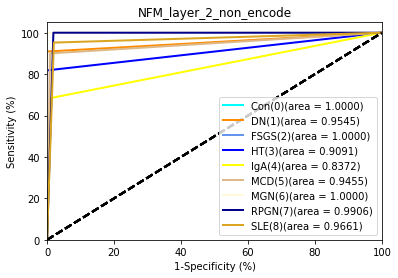

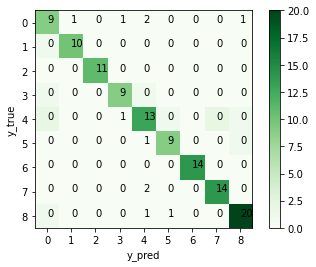

In [2]:
import torch

#功能：加载保存到path中的各层参数到神经网络

#path='models/NFM_layer_2/MLP610.pkl'
#path='models/NFM_layer_2/MLP610.pt'
path='models/NFM_layer_2/MLP610.pt'
nfm=NFM(nfm_config)
#mlp=MLP()
print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
nfm.load_state_dict(torch.load(path),strict=False)
nfm.cuda()

print(nfm)




nfm_params = list(nfm.named_parameters())
#print(nfm_params)
net=nfm


#testset = KZDatasetTest(csv_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info.csv')
testset = KZDatasetTest(csv_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info.csv')   
test_loader = data.DataLoader(
         dataset=testset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/121708431# 
from torch.autograd import Variable 
from torch.utils.data import DataLoader 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
 
def evaluate_model(test_dl, model): 
    model.eval()#测试数据稳定
    predictions, actuals = [], [] 
    for i, (inputs,bi_inputs ,targets) in enumerate(test_dl): 
        # evaluate the model on the test set 
        #print(\ inputs:\ ,inputs) 
        #print(\ targets:\ ,targets) 
        inputs = Variable(inputs) 
        bi_inputs=Variable(bi_inputs)
        targets = Variable(targets) 
                 
                 
        #x = torch.tensor(x, dtype=torch.float) 
        #x=x.clone().detach().requires_grad_(True) 
        inputs=torch.tensor(inputs,dtype=torch.float) 
        bi_inputs=torch.tensor(bi_inputs,dtype=torch.float)
        targets=torch.tensor(targets,dtype=torch.float) 
        inputs,bi_inputs, targets = inputs.cuda(), bi_inputs.cuda(),targets.cuda() 
        yhat = model(inputs,bi_inputs) 
        # retrieve numpy array 
        #yhat = yhat.detach().numpy() 
        yhat = yhat.detach().cpu().numpy()#转换到cpu 
        # yhat=yhat.argmax(axis=1) 
        #print(yhat:\ ,yhat) 
        #print('yhat.shape:',yhat.shape) 
        actual = targets.detach().cpu().numpy() 
        actual=actual.round() 
        #print(\ actual:\ ,actual) 
        #print('actual.shape:',actual.shape
        #predictions.appe) 
        #actual = actual.reshape(-1, 1) 
        # round to class values 
        yhat = yhat.round() 
        # store nd(yhat) 
        actuals.append(actual) 
        predictions.append(yhat)
    #print("prediction:" ,predictions) 
    #print("actuals:",actuals) 
    predictions, actuals = np.vstack(predictions), np.vstack(actuals) 
    #print("prediction:" ,predictions) 
    #print("actuals:" ,actuals) 
    # calculate accuracy 
    acc_test = accuracy_score(actuals, predictions) 
    return  actuals, predictions,acc_test 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch

#功能：加载保存到path中的各层参数到神经网络






import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 
target_list=actuals 
pred_list=predictions 
      
y_true=target_list 
y_pred=pred_list 
      
f1=f1_score(y_true=target_list, y_pred=pred_list, average='macro') # 也可以指定micro模式 
acc_score=accuracy_score(y_true=target_list, y_pred=pred_list) 
rec_score=recall_score(y_true=target_list,y_pred=pred_list,average='macro') # 也可以指定micro模式 
pre_recall=precision_score(y_true=target_list,y_pred=pred_list,average='macro') 
print("f1_score:  %.4f" ,f1) 
print("accuracy_score:" ,acc_score) 
print("recall_score:",rec_score) 
print("pre_recall:" ,pre_recall)



auc_curve = roc_auc_score(y_true, y_pred, multi_class='ovo')
#———————————————— 
#版权声明：本文为CSDN博主「农民小飞侠」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/w5688414/article/details/106595892 
PM_y=y_pred 
true_y=y_true 
n_classes=PM_y.shape[1] 
      
print("n_classes:",n_classes) 
fpr = dict() 
tpr = dict() 
roc_auc = dict() 
for i in range(n_classes): 
    fpr[i], tpr[i], _ = roc_curve(true_y[:, i], PM_y[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i]) 
    #print(i) 
    #print(fpr) 
    #print(tpr) 
    
    
    
#计算macro auc 
from scipy import interp 
# First aggregate all false positive rates 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)])) 
       
# Then interpolate all ROC curves at this points 
mean_tpr = np.zeros_like(all_fpr) 
for i in range(n_classes): 
    mean_tpr += interp(all_fpr, fpr[i], tpr[i]) 
       
    # Finally average it and compute AUC 
    mean_tpr /= n_classes 
       
    fpr["macro"] = all_fpr 
    tpr["macro"] = mean_tpr 
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    
    
#画图 
      
import matplotlib.pyplot as plt 
from itertools import cycle 
from matplotlib.ticker import FuncFormatter 
lw = 2 
# Plot all ROC curves 
plt.figure() 
labels=['Con(0)','DN(1)','FSGS(2)','HT(3)','IgA(4)','MCD(5)','MGN(6)','RPGN(7)','SLE(8)'] 

'''
plt.plot(fpr["macro"], tpr["macro"], 
              label='macro-average ROC curve (area = {0:0.4f})' 
                    ''.format(roc_auc["macro"]), 
              color='navy', linestyle=':', linewidth=4) 
'''

       
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue','yellow','burlywood','cornsilk','darkblue','goldenrod','greenyellow','maroon']) 
for i, color in zip(range(n_classes), colors): 
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, 
                  label=labels[i]+'(area = {0:0.4f})'.format(roc_auc[i])) 
       
    plt.plot([0, 1], [0, 1], 'k--', lw=lw) 
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05]) 
      
      
    plt.xlabel('1-Specificity (%)') 
    plt.ylabel('Sensitivity (%)') 
    plt.title('NFM_layer_2_non_encode') 
      

        
def to_percent(temp, position): 
    return '%1.0f'%(100*temp) 
      
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.legend(loc="lower right" ) 
      
plt.show() 



#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/103074506/ 
      
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt 
import matplotlib as mpl 
      
# 支持中文字体显示, 使用于Mac系统 
#zhfont=mpl.font_manager.FontProperties(fname=\ /Library/Fonts/Songti.ttc\ ) 
      
y_true=actuals# = ['北京', '上海', '成都', '成都', '上海', '北京', '上海', '成都', '北京', '上海'] 
y_pred=predictions #= ['北京', '上海', '成都', '上海', '成都', '成都', '上海', '成都', '北京', '上海'] 
      
#ValueError: multilabel-indicator is not supported 
      
classes = [0,1,2,3,4,5,6,7,8] 
#confusion = confusion_matrix(y_true, y_pred)#ValueError: multilabel-indicator is not supported 
      
confusion = confusion_matrix(y_true.argmax(axis=1), y_pred.argmax(axis=1)) 
# 绘制热度图 
plt.imshow(confusion, cmap=plt.cm.Greens) 
indices = range(len(confusion)) 
#plt.xticks(indices, classes, fontproperties=zhfont) 
#plt.yticks(indices, classes, fontproperties=zhfont) 
      
plt.xticks(indices, classes) 
plt.yticks(indices, classes) 
plt.colorbar() 
plt.xlabel('y_pred') 
plt.ylabel('y_true') 
      
# 显示数据 
for first_index in range(len(confusion)): 
    for second_index in range(len(confusion[first_index])): 
        plt.text(first_index, second_index, confusion[first_index][second_index]) 
      
# 显示图片 
plt.show()

In [3]:
from torch.autograd import Variable 
from torch.utils.data import DataLoader 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
 
def bool_predict_model(test_dl, model): 
    model.eval()#测试数据稳定
    error_dataset=torch.tensor([0])
    error_dataset=error_dataset.view(1,1)
    predictions, actuals = [], [] 
    num=0
    for i, (inputs,bi_inputs ,targets) in enumerate(test_dl): 
        # evaluate the model on the test set 
        #print(\ inputs:\ ,inputs) 
        #print(\ targets:\ ,targets) 
        inputs = Variable(inputs) 
        bi_inputs=Variable(bi_inputs)
        targets = Variable(targets) 
        #print(targets)
        #print('targets:',targets.shape)        
        #targets=targets.argmax(axis=1)  
        #print('targets:',targets.shape)
        #x = torch.tensor(x, dtype=torch.float) 
        #x=x.clone().detach().requires_grad_(True) 
        inputs=torch.tensor(inputs,dtype=torch.float) 
        bi_inputs=torch.tensor(bi_inputs,dtype=torch.float)
        targets=torch.tensor(targets,dtype=torch.float) 
        inputs,bi_inputs, targets = inputs.cuda(), bi_inputs.cuda(),targets.cuda() 
        yhat = model(inputs,bi_inputs) 
        
        yhat=yhat.argmax(axis=1)
        print('yhat:',yhat.shape)
        
        if targets==yhat:
            return True
        else:
            return False

In [4]:
import pandas as pd 
test_df=pd.read_csv('dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv',sep=',')
test_df=test_df.iloc[:,1:]
rows,cols=test_df.shape
print(rows,cols)
import torch

#功能：加载保存到path中的各层参数到神经网络

path='models/NFM_layer_2/MLP610.pt'

nfm=NFM(nfm_config)
#mlp=MLP()
print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
nfm.load_state_dict(torch.load(path),strict=False)
nfm.cuda()

print(nfm)




nfm_params = list(nfm.named_parameters())
#print(nfm_params)
net=nfm


#testset = KZDatasetPredict(test_df)
''''
test_loader = data.DataLoader(
         dataset=testset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
'''
false_list=[]
for i in range(rows):
    df_list=test_df.iloc[i,:].tolist()
    print(type(df_list))
    print('df_list:',df_list[-1])
    #print(data_set)
    print('this is data_set')
    data_set = KZDatasetPredict(df_list)
    data_test_loader=data.DataLoader(dataset=data_set,
                                    batch_size=1)
    print(data_test_loader)
    bool_index=bool_predict_model(data_test_loader,nfm)
    print(bool_index)
    if bool_index==False:
        
        false_list.append(i)
        #test_df=test_df.drop(index=i, inplace=True)
        
for i,aitem in enumerate(false_list):
    test_df.drop(index=i, inplace=True)#####################
print(test_df.shape)   

test_df.to_csv('dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info6_from_train_mean.csv')

549 3301
NFM(
  (bi_BN): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (BN_num): BatchNorm1d(3300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear1): Linear(in_features=3300, out_features=800, bias=True)
  (bn1): BatchNorm1d(800, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop1): Dropout(p=0.5, inplace=False)
  (relu1): ReLU()
  (linear2): Linear(in_features=810, out_features=50, bias=True)
  (bn2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop2): Dropout(p=0.5, inplace=False)
  (relu2): ReLU()
  (linear3): Linear(in_features=50, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
)
NFM(
  (bi_BN): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (BN_num): BatchNorm1d(3300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear1)

/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:699: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or

yhat: torch.Size([1])
True
<class 'list'>
df_list: 6.0
this is data_set
data_info: 6.0
labels: [6]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 1.0
this is data_set
data_info: 1.0
labels: [1]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 1.0
this is data_set
data_info: 1.0
labels: [1]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 6.0
this is data_set
data_info: 6.0
labels: [6]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 8.0
this is data_set
data_info: 8.0
labels: [8]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 8.0
this is data_set
data_info: 8.0
labels: [8]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 8.0
this is data_set
data_info: 8.0
labels: [8]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 2.0
this is data_set
data_info: 2.0
labels: [2]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 4.0
t

<class 'list'>
df_list: 6.0
this is data_set
data_info: 6.0
labels: [6]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 3.0
this is data_set
data_info: 3.0
labels: [3]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 6.0
this is data_set
data_info: 6.0
labels: [6]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 4.0
this is data_set
data_info: 4.0
labels: [4]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 8.0
this is data_set
data_info: 8.0
labels: [8]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 0.0
this is data_set
data_info: 0.0
labels: [0]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 4.0
this is data_set
data_info: 4.0
labels: [4]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 6.0
this is data_set
data_info: 6.0
labels: [6]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 2.0
this is data_set
data_info: 

<class 'list'>
df_list: 0.0
this is data_set
data_info: 0.0
labels: [0]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 5.0
this is data_set
data_info: 5.0
labels: [5]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 8.0
this is data_set
data_info: 8.0
labels: [8]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 1.0
this is data_set
data_info: 1.0
labels: [1]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 3.0
this is data_set
data_info: 3.0
labels: [3]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 2.0
this is data_set
data_info: 2.0
labels: [2]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 1.0
this is data_set
data_info: 1.0
labels: [1]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 1.0
this is data_set
data_info: 1.0
labels: [1]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 8.0
this is data_set
data_info: 

labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 6.0
this is data_set
data_info: 6.0
labels: [6]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 5.0
this is data_set
data_info: 5.0
labels: [5]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 1.0
this is data_set
data_info: 1.0
labels: [1]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 3.0
this is data_set
data_info: 3.0
labels: [3]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 6.0
this is data_set
data_info: 6.0
labels: [6]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 8.0
this is data_set
data_info: 8.0
labels: [8]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 6.0
this is data_set
data_info: 6.0
labels: [6]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 4.0
this is data_set
data_info: 4.0
labels: [4]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'li

yhat: torch.Size([1])
True
<class 'list'>
df_list: 1.0
this is data_set
data_info: 1.0
labels: [1]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 0.0
this is data_set
data_info: 0.0
labels: [0]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 8.0
this is data_set
data_info: 8.0
labels: [8]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 7.0
this is data_set
data_info: 7.0
labels: [7]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 3.0
this is data_set
data_info: 3.0
labels: [3]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 0.0
this is data_set
data_info: 0.0
labels: [0]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 7.0
this is data_set
data_info: 7.0
labels: [7]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 1.0
this is data_set
data_info: 1.0
labels: [1]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 4.0
t

labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 0.0
this is data_set
data_info: 0.0
labels: [0]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 1.0
this is data_set
data_info: 1.0
labels: [1]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 4.0
this is data_set
data_info: 4.0
labels: [4]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 4.0
this is data_set
data_info: 4.0
labels: [4]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 2.0
this is data_set
data_info: 2.0
labels: [2]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 5.0
this is data_set
data_info: 5.0
labels: [5]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 8.0
this is data_set
data_info: 8.0
labels: [8]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 3.0
this is data_set
data_info: 3.0
labels: [3]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'li

yhat: torch.Size([1])
True
<class 'list'>
df_list: 6.0
this is data_set
data_info: 6.0
labels: [6]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 5.0
this is data_set
data_info: 5.0
labels: [5]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 0.0
this is data_set
data_info: 0.0
labels: [0]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 2.0
this is data_set
data_info: 2.0
labels: [2]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 8.0
this is data_set
data_info: 8.0
labels: [8]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 8.0
this is data_set
data_info: 8.0
labels: [8]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 3.0
this is data_set
data_info: 3.0
labels: [3]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 1.0
this is data_set
data_info: 1.0
labels: [1]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 7.0
t

True
<class 'list'>
df_list: 0.0
this is data_set
data_info: 0.0
labels: [0]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 4.0
this is data_set
data_info: 4.0
labels: [4]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 4.0
this is data_set
data_info: 4.0
labels: [4]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 6.0
this is data_set
data_info: 6.0
labels: [6]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 1.0
this is data_set
data_info: 1.0
labels: [1]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 4.0
this is data_set
data_info: 4.0
labels: [4]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 7.0
this is data_set
data_info: 7.0
labels: [7]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 6.0
this is data_set
data_info: 6.0
labels: [6]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 3.0
this is data_set
data_i

df_list: 2.0
this is data_set
data_info: 2.0
labels: [2]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 8.0
this is data_set
data_info: 8.0
labels: [8]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 4.0
this is data_set
data_info: 4.0
labels: [4]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 4.0
this is data_set
data_info: 4.0
labels: [4]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 8.0
this is data_set
data_info: 8.0
labels: [8]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 4.0
this is data_set
data_info: 4.0
labels: [4]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 2.0
this is data_set
data_info: 2.0
labels: [2]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 2.0
this is data_set
data_info: 2.0
labels: [2]
labels.shape: (1,)
yhat: torch.Size([1])
True
<class 'list'>
df_list: 8.0
this is data_set
data_info: 8.0
labels: [8]

In [7]:
#compute mean value of all the correctly predicted samples:
#topk=20
import pandas as pd 
import torch
import numpy as np
test_df=pd.read_csv('dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info6_from_train_mean.csv',sep=',')
test_df=test_df.iloc[:,1:]
rows,cols=test_df.shape
print(rows,cols)
columns=test_df.columns[:-1].tolist()
#columns=torch.tensor(columns).cuda()#ValueError: too many dimensions 'str'


row_mean=test_df.mean(axis=0)
print(row_mean)
row_mean=row_mean[:-1]#drop off label
row_mean_np=np.array(row_mean).reshape(1,-1)
print(row_mean_np)
row_mean_df=pd.DataFrame(row_mean_np)
print(row_mean_df)
row_mean_df.columns=test_df.columns[:-1]
print(row_mean_df)
row_mean_tensor=torch.from_numpy(row_mean_np).cuda()
row_mean_tensor=torch.tensor(row_mean_tensor,dtype=torch.float)
#去掉行




#compute contribution using the Equ.
import torch

#功能：加载保存到path中的各层参数到神经网络

import torch

#功能：加载保存到path中的各层参数到神经网络

import torch

#功能：加载保存到path中的各层参数到神经网络

import torch

#功能：加载保存到path中的各层参数到神经网络

import torch

#功能：加载保存到path中的各层参数到神经网络

path='models/NFM_layer_2/MLP610.pt'

#nfm=NFM(nfm_config)
nfm=NFM(nfm_config)
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
nfm.load_state_dict(torch.load(path),strict=False)
nfm.cuda()

print(nfm)




nfm_params = list(nfm.named_parameters())
#print(nfm_params)
net=nfm



weight={}
for name,parameters in net.named_parameters():
    print(name,':',parameters.size())
    #names.append(name)
    weight[name]=parameters
#print("weight:",weight)
#q
'''
bi_BN.weight : torch.Size([10])
bi_BN.bias : torch.Size([10])
BN_num.weight : torch.Size([3300])
BN_num.bias : torch.Size([3300])
linear1.weight : torch.Size([800, 3300])
linear1.bias : torch.Size([800])
bn1.weight : torch.Size([800])
bn1.bias : torch.Size([800])
linear2.weight : torch.Size([50, 810])
linear2.bias : torch.Size([50])
bn2.weight : torch.Size([50])
bn2.bias : torch.Size([50])
linear3.weight : torch.Size([9, 50])
linear3.bias : torch.Size([9])
bn3.weight : torch.Size([9])
bn3.bias : torch.Size([9])
import pandas as pd 
import numpy as np
'''








def one_hot_smoothing(labels, classes, label_smoothing=0.2):
    n = len(labels)
    #n=labels.shape[0]
    eoff = label_smoothing / classes
    output = np.ones((n, classes), dtype=np.float32) * eoff
    for row, label in enumerate(labels):
        output[row, label] = 1 - label_smoothing + eoff
        #print("row:",row,"label:",label)
    return output







l3=torch.mm(weight['linear3.weight'],weight['linear2.weight'][:,:800])
print('l3:',l3.shape)
l2=torch.mm(l3,weight['linear1.weight'])
print('l2:',l2.shape)
contri_k=[]
contri_k_names=[]
for i in range(nfm_config['n_class']):
    l1=torch.mm(l2,row_mean_tensor.T)
    uu=l2[i,:]*row_mean_tensor.reshape(3300)
    print(uu.shape)
    top_k=torch.topk(uu,20,largest=True)######################K==50
    print('top_k:',top_k)
    
    contri_k.append(top_k)
    top_k_indices=top_k.indices.cpu().detach().numpy().tolist()
    print('top_k_indices:',top_k_indices)
    top_k_names=[columns[j] for j in top_k_indices]
    print(top_k_names)
    contri_k_names.append(top_k_names)

contri_k_names_np=np.array(contri_k_names)
print(contri_k_names_np.shape)

contri_k_names_df=pd.DataFrame(contri_k_names_np)
contri_k_names_df.to_csv('results_genes/NFM_layer_2/contri_20_names_df_from_train_mean.csv')
#from chartGPT of the following code
result = set()
for sublist in contri_k_names:
    result = result.union(sublist)

# 或者使用集合的union方法的更简洁写法，使用集合解析
# result = set().union(*list_of_lists)

# 或者使用 | 运算符
# result = set().union(*list_of_lists)

# 将结果转回列表
result_list = list(result)

print(result_list)

import csv
csv_filename = "results_genes/NFM_layer_2/genes_20_from_train_mean.csv"

# 使用CSV模块保存列表为CSV文件
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    writer.writerow(result_list)

#这将输出所有列表的并集，不包含重复的元素。在这个例子中，结果会是 [1, 2, 3, 4, 5, 6, 7]。你可以根据你的实际需求将这个结果转换为列表或者保留为集合，具体取决于你的应用场景。
#抽取训练集和测试集中的数据

#生成新选取元素的数据集
train_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv'
test_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info.csv'

train_df=pd.read_csv(train_path,sep=',')
train_df1=train_df
print(train_df1.columns)
train_df=train_df.iloc[:,1:]
train_df1=train_df1.iloc[:,1:-1]

columns=result_list
columns.append('label')
print(columns)


train_df2=train_df[columns]
print(train_df2.shape)
train_df2.to_csv('dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/NFM_layer_2_20/from_train_mean_train_val_info.csv')

test_df=pd.read_csv(test_path,sep=',')

test_df=test_df.iloc[:,1:]



test_df=test_df[columns]
print(test_df.shape)
test_df.to_csv('dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/NFM_layer_2_20/from_train_mean_test_info.csv')



549 3301
RHOA       11.683852
STX2        7.439581
CISD1       9.581447
WDR11       8.187874
SCYL2       6.838329
             ...    
SULT1A1     9.892269
AMOT       11.339053
CA1         6.417625
GPR35       5.402769
label       4.566485
Length: 3301, dtype: float64
[[11.68385174  7.43958114  9.5814466  ... 11.33905256  6.41762467
   5.40276863]]
        0         1         2         3         4         5         6     \
0  11.683852  7.439581  9.581447  8.187874  6.838329  4.953906  9.346777   

     7         8         9     ...      3290      3291      3292      3293  \
0  5.5352  4.973143  6.494043  ...  8.132399  6.134963  7.970936  6.333414   

       3294      3295      3296       3297      3298      3299  
0  7.542314  6.587032  9.892269  11.339053  6.417625  5.402769  

[1 rows x 3300 columns]
        RHOA      STX2     CISD1     WDR11     SCYL2   MGC2889    CCDC47  \
0  11.683852  7.439581  9.581447  8.187874  6.838329  4.953906  9.346777   

     KLF8      CCL1   SLCO3A1  

/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Index(['Unnamed: 0', 'RHOA', 'STX2', 'CISD1', 'WDR11', 'SCYL2', 'MGC2889',
       'CCDC47', 'KLF8', 'CCL1',
       ...
       'PLAC4', 'NRBP1', 'LRRC23', 'SPHK2', 'KIAA0513', 'SULT1A1', 'AMOT',
       'CA1', 'GPR35', 'label'],
      dtype='object', length=3302)
['MRPS16', 'CYP39A1', 'SPI1', 'RGS5', 'VDR', 'WDR12', 'KLF6', 'TIPARP', 'CAMLG', 'CPVL', 'MEST', 'TYMP', 'ATP6V1F', 'EPM2AIP1', 'COX5B', 'SERPINA3', 'LGMN', 'NR0B2', 'KLF9', 'CTTN', 'TMEM100', 'AGL', 'ISCU', 'TFAP2A', 'CFLAR', 'TESC', 'ABCC3', 'SH3BP2', 'ENPP2', 'TFAM', 'CFB', 'UQCR10', 'BCCIP', 'ADI1', 'SLC3A2', 'ELF3', 'WARS2', 'SERPINF1', 'ADORA3', 'RHOB', 'PDK3', 'PCK1', 'ACVR1B', 'ZNHIT1', 'UGDH', 'GLB1L', 'RPA3', 'AHCYL1', 'LIPG', 'WASHC3', 'PTMS', 'MAP3K1', 'RRM2', 'TUBA4B', 'CYP2J2', 'CHP1', 'PAFAH1B3', 'METTL9', 'EEF1AKMT3', 'ACE', 'TRA2A', 'OLFML3', 'CGREF1', 'ABLIM1', 'MRPS15', 'GPX2', 'MYO15B', 'LARP1', 'L1CAM', 'ACP6', 'IFI27', 'HKDC1', 'ADPRM', 'FST', 'VTCN1', 'ALB', 'HERC5', 'BHLHE40', 'COX8A', 'IFI6', 'PAX2', 'IF

/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:444: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:445: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:446: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:699: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach()

total_train_accuracy: tensor(0.3271, device='cuda:0')
Training Epoch: 0, total loss: 42.486823
total_train_accuracy: tensor(0.4208, device='cuda:0')
Training Epoch: 1, total loss: 41.638495
total_train_accuracy: tensor(0.5271, device='cuda:0')
Training Epoch: 2, total loss: 40.665427
total_train_accuracy: tensor(0.5729, device='cuda:0')
Training Epoch: 3, total loss: 40.026201
total_train_accuracy: tensor(0.6521, device='cuda:0')
Training Epoch: 4, total loss: 39.591702
total_train_accuracy: tensor(0.6604, device='cuda:0')
Training Epoch: 5, total loss: 38.936471
total_train_accuracy: tensor(0.7083, device='cuda:0')
Training Epoch: 6, total loss: 38.475467
total_train_accuracy: tensor(0.7292, device='cuda:0')
Training Epoch: 7, total loss: 37.881885
total_train_accuracy: tensor(0.7438, device='cuda:0')
Training Epoch: 8, total loss: 37.634536
total_train_accuracy: tensor(0.7250, device='cuda:0')
Training Epoch: 9, total loss: 37.640536
total_train_accuracy: tensor(0.7750, device='cuda:

total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 86, total loss: 30.978282
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 87, total loss: 30.740500
total_train_accuracy: tensor(0.8958, device='cuda:0')
Training Epoch: 88, total loss: 31.331228
total_train_accuracy: tensor(0.9250, device='cuda:0')
Training Epoch: 89, total loss: 31.022050
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 90, total loss: 30.695790
total_train_accuracy: tensor(0.9104, device='cuda:0')
Training Epoch: 91, total loss: 31.402106
total_train_accuracy: tensor(0.9167, device='cuda:0')
Training Epoch: 92, total loss: 31.128580
total_train_accuracy: tensor(0.9146, device='cuda:0')
Training Epoch: 93, total loss: 31.182313
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 94, total loss: 30.860810
total_train_accuracy: tensor(0.8917, device='cuda:0')
Training Epoch: 95, total loss: 31.293953
total_train_accuracy: tensor(0.9229, dev

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


total_train_accuracy: tensor(0.9167, device='cuda:0')
Training Epoch: 100, total loss: 30.974434
the  0  epoch ends


/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)


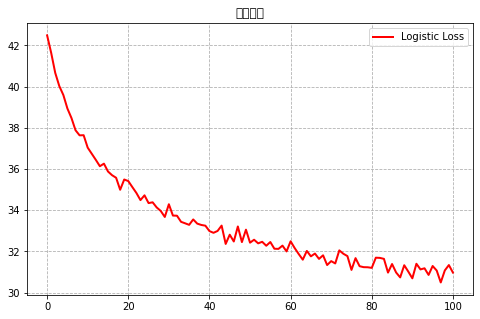

/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:488: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:489: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:490: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


test
test
total_test_accuracy: tensor(0.8125, device='cuda:0')
acc_test_each_k: tensor(0.8125, device='cuda:0')
total_train_accuracy: tensor(0.8958, device='cuda:0')
Training Epoch: 0, total loss: 31.330490
total_train_accuracy: tensor(0.8875, device='cuda:0')
Training Epoch: 1, total loss: 31.583746
total_train_accuracy: tensor(0.9167, device='cuda:0')
Training Epoch: 2, total loss: 30.992942
total_train_accuracy: tensor(0.8979, device='cuda:0')
Training Epoch: 3, total loss: 31.118839
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 4, total loss: 30.927033
total_train_accuracy: tensor(0.9167, device='cuda:0')
Training Epoch: 5, total loss: 30.925273
total_train_accuracy: tensor(0.9208, device='cuda:0')
Training Epoch: 6, total loss: 30.802411
total_train_accuracy: tensor(0.9229, device='cuda:0')
Training Epoch: 7, total loss: 30.921072
total_train_accuracy: tensor(0.9250, device='cuda:0')
Training Epoch: 8, total loss: 30.979057
total_train_accuracy: tensor(0.90

total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 86, total loss: 29.800260
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 87, total loss: 29.691060
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 88, total loss: 29.354554
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 89, total loss: 29.669733
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 90, total loss: 29.514684
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 91, total loss: 29.999470
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 92, total loss: 29.437984
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 93, total loss: 29.607016
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 94, total loss: 29.403380
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 95, total loss: 29.836445
total_train_accuracy: tensor(0.9354, dev

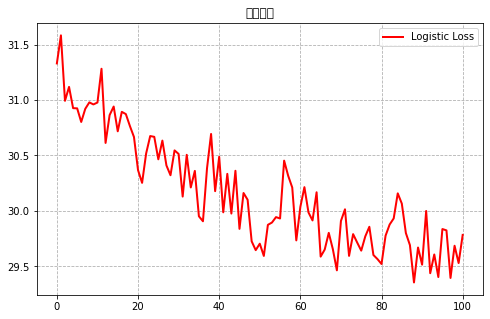

test
test
total_test_accuracy: tensor(0.9167, device='cuda:0')
acc_test_each_k: tensor(0.9167, device='cuda:0')
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 0, total loss: 29.998473
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 1, total loss: 29.519910
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 2, total loss: 29.716138
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 3, total loss: 29.774287
total_train_accuracy: tensor(0.9437, device='cuda:0')
Training Epoch: 4, total loss: 29.647247
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 5, total loss: 29.426540
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 6, total loss: 29.709146
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 7, total loss: 29.700792
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 8, total loss: 29.660528
total_train_accuracy: tensor(0.96

total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 86, total loss: 28.840234
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 87, total loss: 29.029734
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 88, total loss: 28.818360
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 89, total loss: 28.887639
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 90, total loss: 28.801255
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 91, total loss: 29.249314
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 92, total loss: 28.911165
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 93, total loss: 28.854555
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 94, total loss: 29.207570
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 95, total loss: 28.724402
total_train_accuracy: tensor(0.9750, dev

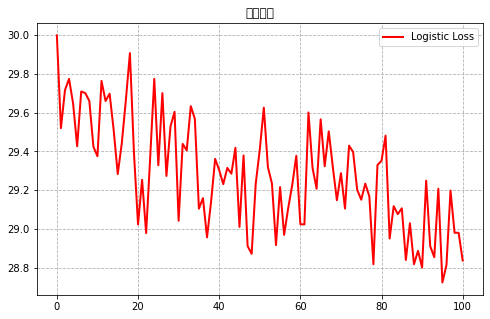

test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 0, total loss: 29.165677
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 1, total loss: 29.126605
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 2, total loss: 28.981462
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 3, total loss: 29.150923
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 4, total loss: 29.103637
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 5, total loss: 28.850245
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 6, total loss: 29.343220
total_train_accuracy: tensor(0.9687, device='cuda:0')
Training Epoch: 7, total loss: 29.005051
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 8, total loss: 29.160740
total_train_accuracy: tensor(0.9625, devi

total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 86, total loss: 28.843023
total_train_accuracy: tensor(0.9812, device='cuda:0')
Training Epoch: 87, total loss: 28.513005
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 88, total loss: 28.635373
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 89, total loss: 28.670880
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 90, total loss: 28.822801
total_train_accuracy: tensor(0.9562, device='cuda:0')
Training Epoch: 91, total loss: 28.979528
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 92, total loss: 28.721603
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 93, total loss: 28.486744
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 94, total loss: 28.813739
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 95, total loss: 28.454068
total_train_accuracy: tensor(0.9625, dev

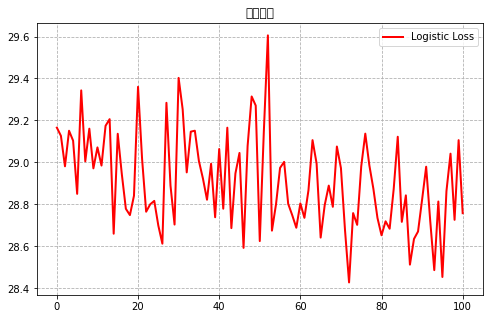

test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 0, total loss: 28.954469
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 1, total loss: 28.852917
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 2, total loss: 29.343609
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 3, total loss: 29.096731
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 4, total loss: 28.968883
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 5, total loss: 29.087085
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 6, total loss: 28.744232
total_train_accuracy: tensor(0.9687, device='cuda:0')
Training Epoch: 7, total loss: 28.751706
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 8, total loss: 28.791608
total_train_accuracy: tensor(0.9792, devi

total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 86, total loss: 28.721585
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 87, total loss: 28.621882
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 88, total loss: 28.515169
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 89, total loss: 28.329996
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 90, total loss: 28.518437
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 91, total loss: 28.462349
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 92, total loss: 28.490102
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 93, total loss: 28.448932
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 94, total loss: 28.749660
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 95, total loss: 28.583679
total_train_accuracy: tensor(0.9563, dev

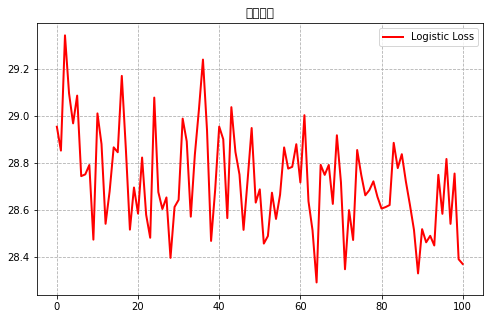

test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 0, total loss: 28.858520
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 1, total loss: 28.748377
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 2, total loss: 28.678775
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 3, total loss: 28.595170
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 4, total loss: 28.606626
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 5, total loss: 28.564719
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 6, total loss: 28.863936
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 7, total loss: 28.542751
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 8, total loss: 28.625122
total_train_accuracy: tensor(0.95

total_train_accuracy: tensor(0.9812, device='cuda:0')
Training Epoch: 86, total loss: 28.249069
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 87, total loss: 28.490227
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 88, total loss: 28.288836
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 89, total loss: 28.400587
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 90, total loss: 28.481536
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 91, total loss: 28.605435
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 92, total loss: 28.586460
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 93, total loss: 28.645140
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 94, total loss: 28.777583
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 95, total loss: 28.413993
total_train_accuracy: tensor(0.9583, dev

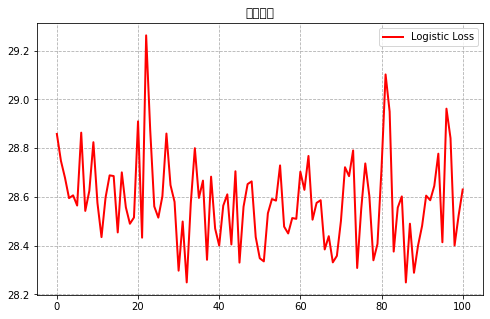

test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 0, total loss: 29.057507
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 1, total loss: 29.041445
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 2, total loss: 28.909545
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 3, total loss: 28.438173
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 4, total loss: 28.892014
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 5, total loss: 28.597975
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 6, total loss: 28.704310
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 7, total loss: 28.342296
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 8, total loss: 28.800613
total_train_accuracy: tensor(0.9750, devi

total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 86, total loss: 28.482172
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 87, total loss: 28.365042
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 88, total loss: 28.191758
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 89, total loss: 28.439988
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 90, total loss: 28.422244
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 91, total loss: 28.255311
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 92, total loss: 28.453634
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 93, total loss: 28.302604
total_train_accuracy: tensor(0.9687, device='cuda:0')
Training Epoch: 94, total loss: 28.409013
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 95, total loss: 28.314603
total_train_accuracy: tensor(0.9646, dev

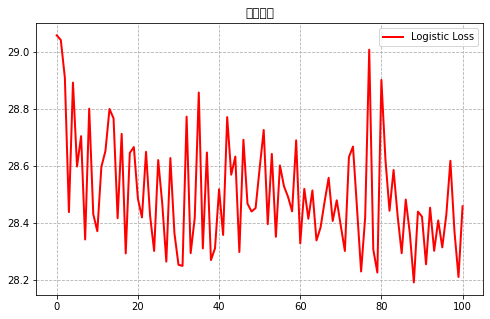

test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 0, total loss: 28.341064
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 1, total loss: 28.420572
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 2, total loss: 28.215681
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 3, total loss: 28.120007
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 4, total loss: 28.628334
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 5, total loss: 28.926469
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 6, total loss: 28.521223
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 7, total loss: 28.434696
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 8, total loss: 28.625509
total_train_accuracy: tensor(0.9750, devi

total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 86, total loss: 28.322747
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 87, total loss: 28.468944
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 88, total loss: 28.437047
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 89, total loss: 28.645908
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 90, total loss: 28.213869
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 91, total loss: 28.354894
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 92, total loss: 28.533095
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 93, total loss: 28.301311
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 94, total loss: 28.456827
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 95, total loss: 28.050157
total_train_accuracy: tensor(0.9812, dev

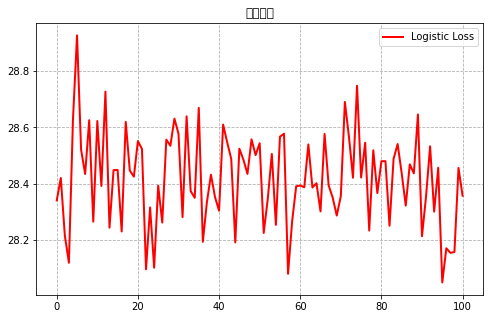

test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 0, total loss: 28.484656
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 1, total loss: 28.370846
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 2, total loss: 28.520465
total_train_accuracy: tensor(0.9812, device='cuda:0')
Training Epoch: 3, total loss: 28.099696
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 4, total loss: 28.295891
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 5, total loss: 28.427547
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 6, total loss: 28.495252
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 7, total loss: 28.317624
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 8, total loss: 28.433655
total_train_accuracy: tensor(0.9771, devi

total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 86, total loss: 28.481071
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 87, total loss: 28.399006
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 88, total loss: 28.590146
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 89, total loss: 28.682859
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 90, total loss: 28.270975
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 91, total loss: 28.478779
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 92, total loss: 28.486614
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 93, total loss: 28.657340
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 94, total loss: 28.357362
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 95, total loss: 28.326943
total_train_accuracy: tensor(0.9688, dev

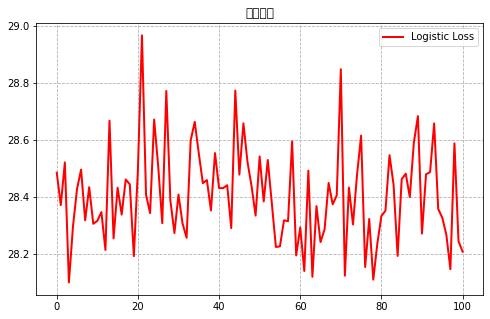

test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 0, total loss: 28.837792
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 1, total loss: 28.604628
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 2, total loss: 28.349848
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 3, total loss: 28.262589
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 4, total loss: 28.321716
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 5, total loss: 28.215117
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 6, total loss: 28.817928
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 7, total loss: 28.240310
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 8, total loss: 28.661462
total_train_accuracy: tensor(0.9833, devi

total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 86, total loss: 28.349340
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 87, total loss: 28.192710
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 88, total loss: 28.535230
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 89, total loss: 28.314912
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 90, total loss: 28.310332
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 91, total loss: 28.031813
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 92, total loss: 28.456464
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 93, total loss: 28.109436
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 94, total loss: 28.270277
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 95, total loss: 28.861376
total_train_accuracy: tensor(0.9813, dev

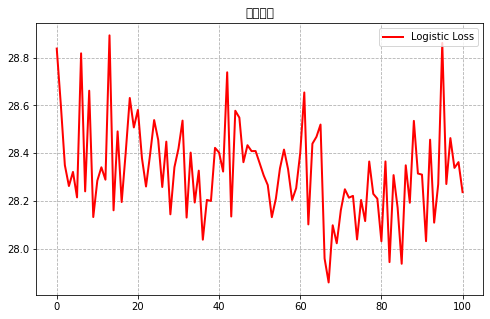

test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
[tensor(0.8125, device='cuda:0'), tensor(0.9167, device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(0.9792, device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0')]
[array(0.8125, dtype=float32), array(0.9166667, dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(0.9791666, dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32)]
acc_test_metrics: 0.9708333


In [10]:
#train to the new dataset  to test whether the features values
#topk=20
model=nfm2
K=10
test_metrics=[]
train_loss_total_list=[]
for ki in range(K):
    trainset = KZDataset(csv_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/NFM_layer_2_20/from_train_mean_train_val_info.csv',K=K, n_class=nfm_config['n_class'],ki=ki,  typ='train', transform=None, rand=True)
    valset = KZDataset(csv_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/NFM_layer_2_20/from_train_mean_train_val_info.csv', K=K,n_class=nfm_config['n_class'],ki=ki,  typ='val', transform=None, rand=True)
    train_loader = data.DataLoader(
         dataset=trainset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size'],
         shuffle=True)
    val_loader = data.DataLoader(
         dataset=valset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
    
    model_path='models/NFM_layer_2_20/from_train_mean/'
    #BATCH_SIZE=batch_size
    optimizer = torch.optim.Adam(model.parameters(), lr=nfm_config['lr'], weight_decay=nfm_config['l2_regularization'])
    #total = 0
    
    
    loss_func=torch.nn.CrossEntropyLoss()
    
    num=0
   
    
    epoches=101
    for epoch_id in range(epoches):
          
        
        
        train_loss_total,acc_train=train_epoch(model,train_loader,nfm_config['batch_size'],optimizer,loss_func)
        train_loss_total_list.append(train_loss_total)#
        if epoch_id %20==0:
            num=num+1
            #path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pkl')
            #torch.save(model.state_dict(),path)
            # 保存模型
            
            path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pt')##################pt
            torch.save(model.state_dict(),path)
            #torch.save(model.state_dict(),path)
    print("the ",ki," epoch ends")
    plotLoss(train_loss_total_list,epoches)
    train_loss_total_list=[]
    acc_test=val_epoch(model,val_loader,nfm_config['batch_size'],optimizer)
    print("acc_test_each_k:",acc_test)
    test_metrics.append(acc_test)

print(test_metrics)
#test_metrics=test_metrics.tolist()
test_metrics=[x.cpu().detach().numpy() for x in test_metrics]
print(test_metrics)
acc_test_metrics=np.mean(test_metrics) 
print("acc_test_metrics:",acc_test_metrics)
       


NFM(
  (bi_BN): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (BN_num): BatchNorm1d(135, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear1): Linear(in_features=135, out_features=800, bias=True)
  (bn1): BatchNorm1d(800, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop1): Dropout(p=0.5, inplace=False)
  (relu1): ReLU()
  (linear2): Linear(in_features=810, out_features=50, bias=True)
  (bn2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop2): Dropout(p=0.5, inplace=False)
  (relu2): ReLU()
  (linear3): Linear(in_features=50, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
)
NFM(
  (bi_BN): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (BN_num): BatchNorm1d(135, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear1): Linear(in_

/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:699: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or

f1_score:  %.4f 0.9216095795043162
accuracy_score: 0.9
recall_score: 0.899600010126326
pre_recall: 0.951653439153439
n_classes: 9


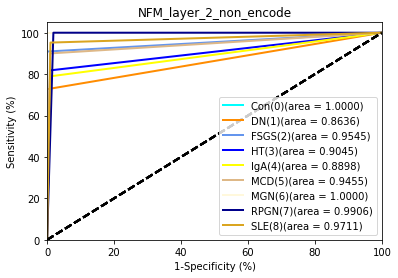

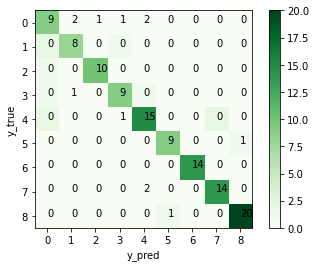

In [11]:
import torch

#功能：加载保存到path中的各层参数到神经网络

#path='models/NFM_layer_2/MLP610.pkl'
path='models/NFM_layer_2_20/from_train_mean/MLP610.pt'
nfm2=NFM(nfm_config2)
#mlp=MLP()
print(nfm2)
#net = nn.DataParallel(net)
#net = net.to(device)
nfm2.load_state_dict(torch.load(path),strict=False)
nfm2.cuda()

print(nfm2)




nfm_params2 = list(nfm2.named_parameters())
#print(nfm_params)
net=nfm2


testset = KZDatasetTest(csv_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/NFM_layer_2_20/from_train_mean_test_info.csv')
   
test_loader = data.DataLoader(
         dataset=testset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config1['batch_size']
        
     )
#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/121708431# 
from torch.autograd import Variable 
from torch.utils.data import DataLoader 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
 
def evaluate_model(test_dl, model): 
    model.eval()#测试数据稳定
    predictions, actuals = [], [] 
    for i, (inputs,bi_inputs ,targets) in enumerate(test_dl): 
        # evaluate the model on the test set 
        #print(\ inputs:\ ,inputs) 
        #print(\ targets:\ ,targets) 
        inputs = Variable(inputs) 
        bi_inputs=Variable(bi_inputs)
        targets = Variable(targets) 
                 
                 
        #x = torch.tensor(x, dtype=torch.float) 
        #x=x.clone().detach().requires_grad_(True) 
        inputs=torch.tensor(inputs,dtype=torch.float) 
        bi_inputs=torch.tensor(bi_inputs,dtype=torch.float)
        targets=torch.tensor(targets,dtype=torch.float) 
        inputs,bi_inputs, targets = inputs.cuda(), bi_inputs.cuda(),targets.cuda() 
        yhat = model(inputs,bi_inputs) 
        # retrieve numpy array 
        #yhat = yhat.detach().numpy() 
        yhat = yhat.detach().cpu().numpy()#转换到cpu 
        # yhat=yhat.argmax(axis=1) 
        #print(yhat:\ ,yhat) 
        #print('yhat.shape:',yhat.shape) 
        actual = targets.detach().cpu().numpy() 
        actual=actual.round() 
        #print(\ actual:\ ,actual) 
        #print('actual.shape:',actual.shape
        #predictions.appe) 
        #actual = actual.reshape(-1, 1) 
        # round to class values 
        yhat = yhat.round() 
        # store nd(yhat) 
        actuals.append(actual) 
        predictions.append(yhat)
    #print("prediction:" ,predictions) 
    #print("actuals:",actuals) 
    predictions, actuals = np.vstack(predictions), np.vstack(actuals) 
    #print("prediction:" ,predictions) 
    #print("actuals:" ,actuals) 
    # calculate accuracy 
    acc_test = accuracy_score(actuals, predictions) 
    return  actuals, predictions,acc_test 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch

#功能：加载保存到path中的各层参数到神经网络






import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 
target_list=actuals 
pred_list=predictions 
      
y_true=target_list 
y_pred=pred_list 
      
f1=f1_score(y_true=target_list, y_pred=pred_list, average='macro') # 也可以指定micro模式 
acc_score=accuracy_score(y_true=target_list, y_pred=pred_list) 
rec_score=recall_score(y_true=target_list,y_pred=pred_list,average='macro') # 也可以指定micro模式 
pre_recall=precision_score(y_true=target_list,y_pred=pred_list,average='macro') 
print("f1_score:  %.4f" ,f1) 
print("accuracy_score:" ,acc_score) 
print("recall_score:",rec_score) 
print("pre_recall:" ,pre_recall)



auc_curve = roc_auc_score(y_true, y_pred, multi_class='ovo')
#———————————————— 
#版权声明：本文为CSDN博主「农民小飞侠」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/w5688414/article/details/106595892 
PM_y=y_pred 
true_y=y_true 
n_classes=PM_y.shape[1] 
      
print("n_classes:",n_classes) 
fpr = dict() 
tpr = dict() 
roc_auc = dict() 
for i in range(n_classes): 
    fpr[i], tpr[i], _ = roc_curve(true_y[:, i], PM_y[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i]) 
    #print(i) 
    #print(fpr) 
    #print(tpr) 
    
    
    
#计算macro auc 
from scipy import interp 
# First aggregate all false positive rates 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)])) 
       
# Then interpolate all ROC curves at this points 
mean_tpr = np.zeros_like(all_fpr) 
for i in range(n_classes): 
    mean_tpr += interp(all_fpr, fpr[i], tpr[i]) 
       
    # Finally average it and compute AUC 
    mean_tpr /= n_classes 
       
    fpr["macro"] = all_fpr 
    tpr["macro"] = mean_tpr 
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    
    
#画图 
      
import matplotlib.pyplot as plt 
from itertools import cycle 
from matplotlib.ticker import FuncFormatter 
lw = 2 
# Plot all ROC curves 
plt.figure() 
labels=['Con(0)','DN(1)','FSGS(2)','HT(3)','IgA(4)','MCD(5)','MGN(6)','RPGN(7)','SLE(8)'] 

'''
plt.plot(fpr["macro"], tpr["macro"], 
              label='macro-average ROC curve (area = {0:0.4f})' 
                    ''.format(roc_auc["macro"]), 
              color='navy', linestyle=':', linewidth=4) 
'''

       
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue','yellow','burlywood','cornsilk','darkblue','goldenrod','greenyellow','maroon']) 
for i, color in zip(range(n_classes), colors): 
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, 
                  label=labels[i]+'(area = {0:0.4f})'.format(roc_auc[i])) 
       
    plt.plot([0, 1], [0, 1], 'k--', lw=lw) 
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05]) 
      
      
    plt.xlabel('1-Specificity (%)') 
    plt.ylabel('Sensitivity (%)') 
    plt.title('NFM_layer_2_non_encode') 
      

        
def to_percent(temp, position): 
    return '%1.0f'%(100*temp) 
      
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.legend(loc="lower right" ) 
      
plt.show() 



#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/103074506/ 
      
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt 
import matplotlib as mpl 
      
# 支持中文字体显示, 使用于Mac系统 
#zhfont=mpl.font_manager.FontProperties(fname=\ /Library/Fonts/Songti.ttc\ ) 
      
y_true=actuals# = ['北京', '上海', '成都', '成都', '上海', '北京', '上海', '成都', '北京', '上海'] 
y_pred=predictions #= ['北京', '上海', '成都', '上海', '成都', '成都', '上海', '成都', '北京', '上海'] 
      
#ValueError: multilabel-indicator is not supported 
      
classes = [0,1,2,3,4,5,6,7,8] 
#confusion = confusion_matrix(y_true, y_pred)#ValueError: multilabel-indicator is not supported 
      
confusion = confusion_matrix(y_true.argmax(axis=1), y_pred.argmax(axis=1)) 
# 绘制热度图 
plt.imshow(confusion, cmap=plt.cm.Greens) 
indices = range(len(confusion)) 
#plt.xticks(indices, classes, fontproperties=zhfont) 
#plt.yticks(indices, classes, fontproperties=zhfont) 
      
plt.xticks(indices, classes) 
plt.yticks(indices, classes) 
plt.colorbar() 
plt.xlabel('y_pred') 
plt.ylabel('y_true') 
      
# 显示数据 
for first_index in range(len(confusion)): 
    for second_index in range(len(confusion[first_index])): 
        plt.text(first_index, second_index, confusion[first_index][second_index]) 
      
# 显示图片 
plt.show()